<a href="https://colab.research.google.com/github/goalman96/Heart-attack-prediction/blob/main/heart_attack_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart attack prediction**

---
Data source info: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download



Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

## Attribute Information:

|                     |                                                                                                                                                                                                                                                  |
|---------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age   :             | Age of the patient [years]                                                                                                                                                                                                                       |
| Sex:                | Sex of the patient [M: Male, F: Female]                                                                                                                                                                                                          |
| ChestPainType   :   | Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP:   Non-Anginal Pain, ASY: Asymptomatic]                                                                                                                                           |
| RestingBP   :       | Resting blood pressure [mm Hg]                                                                                                                                                                                                                   |
| Cholesterol   :     | Serum Cholesterol [mm/dl]                                                                                                                                                                                                                        |
| FastingBS   :       | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                                                                                                                                                                                  |
| RestingECG   :      | Resting Electrocardiogram results [Normal: Normal, ST: having ST-T wave   abnormality (T wave inversions and/or ST elevation or depression of > 0.05   mV), LVH: showing probable or definite left ventricular hypertrophy by Estes'   criteria] |
| MaxHR   :           | Maximum heart rate achieved [Numeric value between 60 and 202]                                                                                                                                                                                   |
| ExerciseAngina   :  | Exercise-induced angina [Y: Yes, N: No]                                                                                                                                                                                                          |
| Oldpeak   :         | ST [Numeric value measured in depression]                                                                                                                                                                                                        |
| ST_Slope   :        | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat,   Down: downsloping]                                                                                                                                                       |
| HeartDisease   :    | Output class [1: heart disease, 0: Normal]                                                                                                                                                                                                       |

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

## Import data

In [ ]:
df = pd.read_csv('heart.csv')

FileNotFoundError: ignored

## Checking data

In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
#checking for missing values
print("Misssing values by column:\n", df.isnull().sum())

#checkin the shape of the dataset
print('\nNumber of rows :', df.shape[0], '\nNumber of columns :', df.shape[1])

#checking for duplicated rows in the dataset
print("\nNumber of duplicated rows: " ,df.duplicated().sum())

Misssing values by column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Number of rows : 918 
Number of columns : 12

Number of duplicated rows:  0


## Find a categorical data

In [ ]:
categorical = [column for column in df.columns if df[column].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
# check for cardinality in categorical variables
# a high number of labels within a variable means a high cardinality. High cardinality may pose some serious problems in the machine learning model.

for i in categorical:
    print(i, ' contains ', len(df[i].unique()), ' labels')

Sex  contains  2  labels
ChestPainType  contains  4  labels
RestingECG  contains  3  labels
ExerciseAngina  contains  2  labels
ST_Slope  contains  3  labels


In [ ]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())

In [ ]:
#the unique values of one of its columns
for col in df:
    a = df[col].unique()
    a.sort()
    print("\n" + col)
    print(a)


Age
[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]

Sex
['F' 'M']

ChestPainType
['ASY' 'ATA' 'NAP' 'TA']

RestingBP
[  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]

Cholesterol
[  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 26

### HeartDisease:
The dataset is relatively balanced set, slightly skewed towards the 1: heart disease class. 



In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## plot value counts for categorical columns in a dataset

In [ ]:
plot_data_categorical = df[categorical]
plot_data_feature = df.drop(columns=categorical, axis = 1)

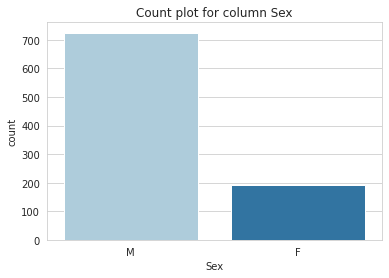

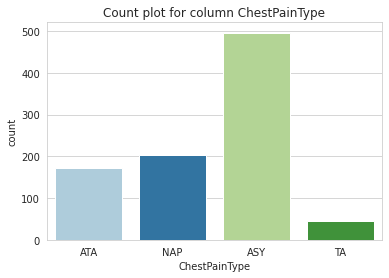

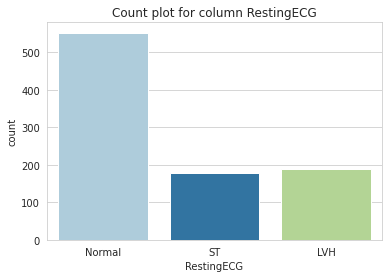

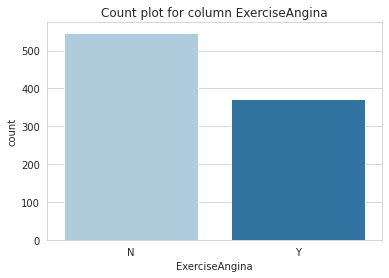

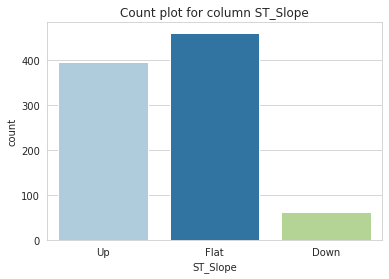

In [ ]:
for image, column in enumerate(plot_data_categorical.columns):
    _ = plt.figure(image)
    _ = sns.countplot(x=column, data=plot_data_categorical).set(title='Count plot for column ' + column)
    sns.set_style('whitegrid')
    sns.set_palette(sns.color_palette("Paired"))

## plot value counts for Feature Distribution in a dataset

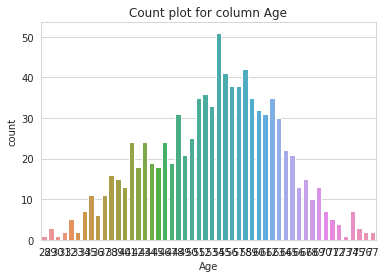

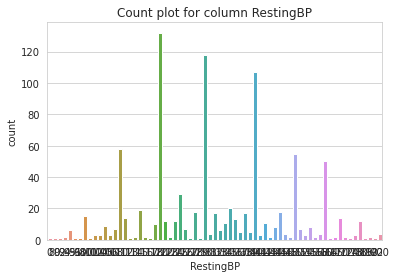

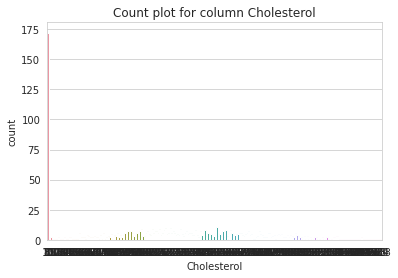

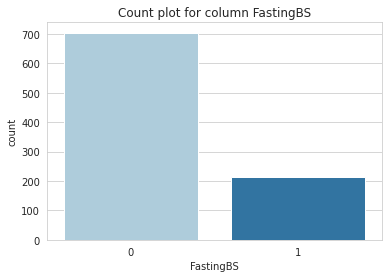

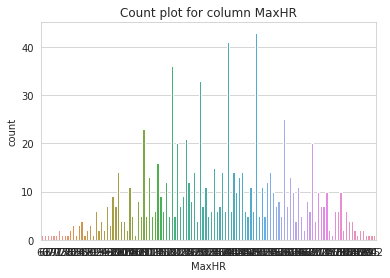

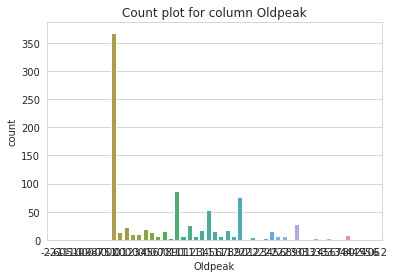

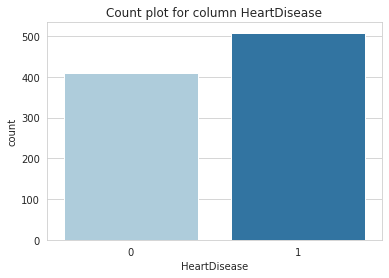

In [ ]:
for image, column in enumerate(plot_data_feature.columns):
    _ = plt.figure(image)
    _ = sns.countplot(x=column, data=plot_data_feature).set(title='Count plot for column ' + column)
    sns.set_style('whitegrid')
    sns.set_palette(sns.color_palette("Paired"))

**Correlation Matrix**

In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

# Data preprocessing

### Delete column FastingBS because of 75 % of values is 0, so this column has small impact

In [ ]:
df_preprocess = df.drop('FastingBS', axis = 1)
df_preprocess

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


### Fill missing values
##### Resting BP (replace zeros with median)

In [ ]:
restingBPmean = df_preprocess.RestingBP.mean()
df_preprocess.RestingBP = df_preprocess.RestingBP.mask(df_preprocess.RestingBP.isin([0]), restingBPmean)

### Cholesterol (replace zeros with median)

In [ ]:
cholesterolmedian = df_preprocess.Cholesterol.median()
df_preprocess.Cholesterol = df_preprocess.Cholesterol.mask(df_preprocess.Cholesterol.isin([0]), cholesterolmedian)

## Make categorical columns from contionuous columns
### Age,Cholesterol, MaxHR, RestingBP 

Scales for this categories was set according to generally accepted standards.

In [ ]:
# Age

df_preprocess.Age = pd.cut(df.Age, bins=[28, 47, 54, 60, 77], labels=['28-47', '48-54', '55-60', '61-77'])

# Cholesterol

df_preprocess.Cholesterol = pd.cut(df.Cholesterol, bins=[0, 200, 239, 603], labels=['Optimal', 'Intermediate', 'High'])

# MaxHR

df_preprocess.MaxHR = pd.cut(df.MaxHR, bins=[0, 100, 140, 202], labels=['Normal', 'Intermediate', 'High'])

# Resting BP

df_preprocess.RestingBP = pd.cut(df.RestingBP, bins=[0, 120, 129, 180, 200], labels=['Normal', 'Elevated', 'Hypertension', 'Crisis'])

In [ ]:
# Make new binar columns from categorical columns
df_dummies = pd.get_dummies(df_preprocess, columns=['Age', 'Cholesterol', 'MaxHR', 'RestingBP', 'Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope'])
df_dummies

,Oldpeak,HeartDisease,Age_28-47,Age_48-54,Age_55-60,Age_61-77,Cholesterol_Optimal,Cholesterol_Intermediate,Cholesterol_High,MaxHR_Normal,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1.0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0.0,0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,1.5,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0.0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.2,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
914,3.4,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
915,1.2,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
916,0.0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Oldpeak                   918 non-null    float64
 1   HeartDisease              918 non-null    int64  
 2   Age_28-47                 918 non-null    uint8  
 3   Age_48-54                 918 non-null    uint8  
 4   Age_55-60                 918 non-null    uint8  
 5   Age_61-77                 918 non-null    uint8  
 6   Cholesterol_Optimal       918 non-null    uint8  
 7   Cholesterol_Intermediate  918 non-null    uint8  
 8   Cholesterol_High          918 non-null    uint8  
 9   MaxHR_Normal              918 non-null    uint8  
 10  MaxHR_Intermediate        918 non-null    uint8  
 11  MaxHR_High                918 non-null    uint8  
 12  RestingBP_Normal          918 non-null    uint8  
 13  RestingBP_Elevated        918 non-null    uint8  
 14  RestingBP_

### For split data to train and test dtype shold be categorical



In [ ]:
# Split to train and test

predictors = pd.Categorical(df_dummies.drop(columns= ['HeartDisease']))
X = df_dummies[predictors]
y = df_dummies['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(642, 29)

In [ ]:
X_test.shape

(276, 29)

# Modeling

## Random forest

In [ ]:
clf_rnd = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid_RandomForest = GridSearchCV(clf_rnd, parametrs, cv=5)
best_params = grid_RandomForest.fit(X_train, y_train).best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
clf_rnd = RandomForestClassifier(**best_params)
clf_rnd = clf_rnd.fit(X_train, y_train)
y_pred = clf_rnd.predict(X_test)
y_score1 = clf_rnd.predict_proba(X_test)[:,1]

dt_scores = cross_val_score(clf_rnd, X, y, cv = 5)


## RandomForest evaluation 

In [ ]:
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(clf_rnd.score(X_train, y_train)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

mean cross validation score: 0.8365110477548111
score without cv: 0.8987538940809969
Accuracy Score : 0.8442028985507246
Precision Score : 0.9006622516556292
Recall Score : 0.8292682926829268
F1 Score : 0.8634920634920634


## Decision Tree Classifier

In [ ]:
parametrs_tree = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
clf_tree = DecisionTreeClassifier()

decision_grid = GridSearchCV(clf_tree, parametrs_tree, cv=5)
best_params_decision = decision_grid.fit(X_train, y_train).best_estimator_.get_params()
best_params_decision


In [ ]:
clf_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=2, min_samples_leaf=6, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_dec = clf_tree.predict(X_test)
y_score2 = clf_tree.predict_proba(X_test)[:,1]

dt_scores2 = cross_val_score(clf_tree , X, y, cv = 5)

## Decision Tree evaluation 

In [ ]:
print("mean cross validation score: {}".format(np.mean(dt_scores2)))
print("score without cv: {}".format(clf_tree.score(X_train, y_train)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_dec)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_dec)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_dec)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_dec)))

mean cross validation score: 0.8299655500118792
score without cv: 0.8769470404984424
Accuracy Score : 0.7971014492753623
Precision Score : 0.9153846153846154
Recall Score : 0.725609756097561
F1 Score : 0.8095238095238095


## Decision Tree graph

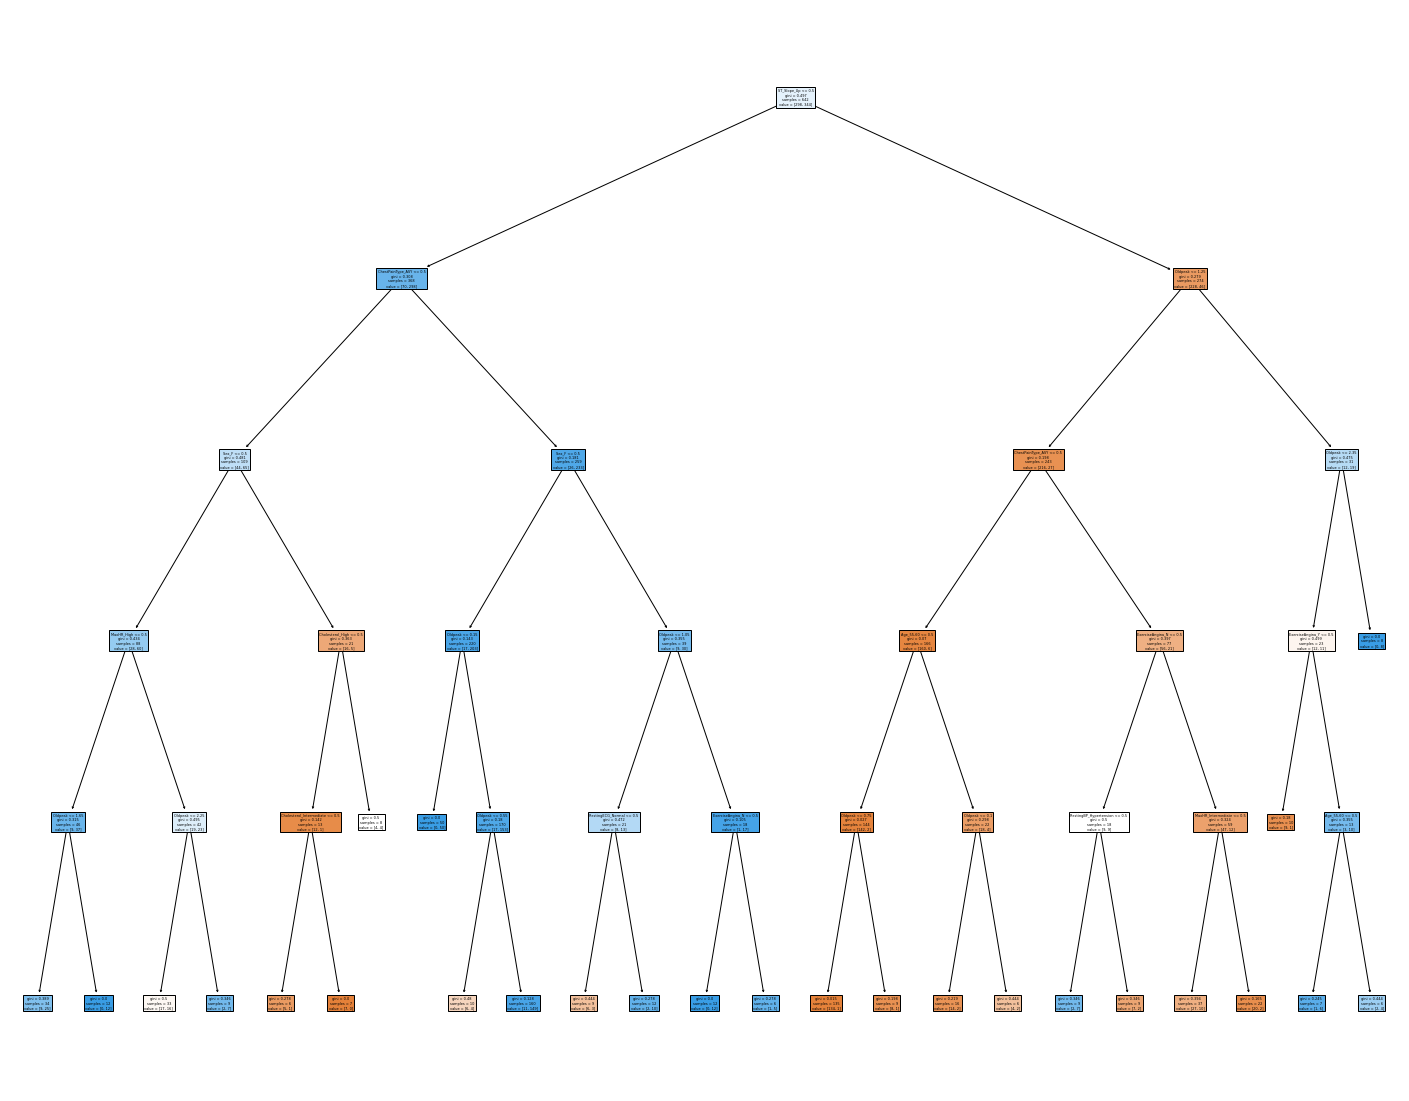

In [ ]:
fig_dec = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree, feature_names=X.columns, 
                   filled=True)

## Logistic Regression





In [ ]:
listC = list(np.power(10.0, np.arange(-4, 4)))

clf_regresion = LogisticRegressionCV(cv=10,Cs=listC,scoring = "accuracy", random_state=42, max_iter=3000)

clf_regresion.fit(X_train, y_train)

y_pred_reg = clf_regresion.predict(X_test)
y_score3 = clf_regresion.predict_proba(X_test)[:,1]

dt_scores3 = cross_val_score(clf_regresion , X, y, cv = 5)

## Logistic Regression evaluation

In [ ]:
print("mean cross validation score: {}".format(np.mean(dt_scores3)))
print("score without cv: {}".format(clf_regresion.score(X_train, y_train)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_reg)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_reg)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_reg)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_reg)))

mean cross validation score: 0.8343668329769542
score without cv: 0.867601246105919
Accuracy Score : 0.8768115942028986
Precision Score : 0.9166666666666666
Recall Score : 0.8719512195121951
F1 Score : 0.8937499999999999


# Evaluation 

### ROC

In [ ]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score2)) 
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score3)) 


roc_auc_score for Random Forest:  0.9232088414634145
roc_auc_score for DecisionTree:  0.889536149825784


## Plot ROC curves

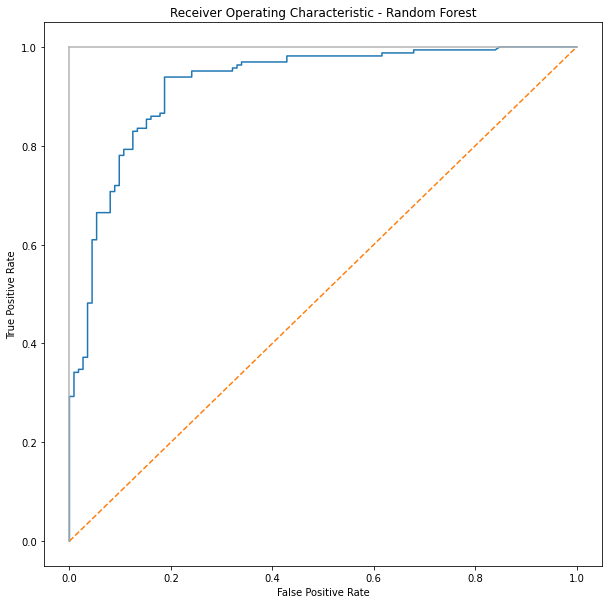

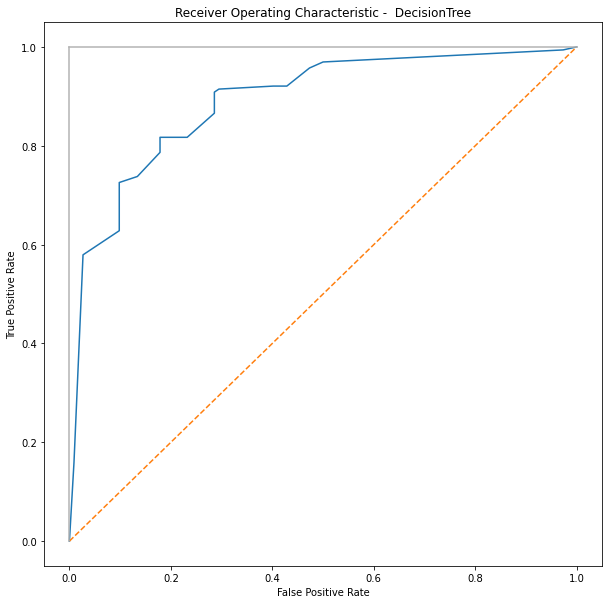

In [ ]:

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic -  DecisionTree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic -  Logistic Regresion')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

### Conclusion

In [ ]:
print('Random Forest matrix: ''\n',confusion_matrix(y_test, y_pred))
print('Random Forest Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('mean cross validation score Random forest: ', format(np.mean(dt_scores)))
print("Random forest score without cv: {}".format(clf_rnd.score(X_train, y_train)))

Random Forest matrix: 
 [[ 97  15]
 [ 28 136]]
Random Forest Accuracy Score : 0.8442028985507246
mean cross validation score Random forest:  0.8365110477548111
Random forest score without cv: 0.8987538940809969


In [ ]:
print('Decision Tree matrix: ''\n',confusion_matrix(y_test, y_pred_dec))
print('Decision Accuracy Score : ' + str(accuracy_score(y_test,y_pred_dec)))
print('mean cross validation score Decision Tree: ', format(np.mean(dt_scores2)))
print("Decision Tree score without cv: {}".format(clf_tree.score(X_train, y_train)))

Decision Tree matrix: 
 [[101  11]
 [ 45 119]]
Decision Accuracy Score : 0.7971014492753623
mean cross validation score Decision Tree:  0.8299655500118792
Decision Tree score without cv: 0.8769470404984424


In [ ]:
print('Decision Tree matrix: ''\n',confusion_matrix(y_test, y_pred_reg))
print('Decision Accuracy Score : ' + str(accuracy_score(y_test,y_pred_reg)))
print('mean cross validation score Decision Tree: ', format(np.mean(dt_scores3)))
print("Decision Tree score without cv: {}".format(clf_regresion.score(X_train, y_train)))

Decision Tree matrix: 
 [[ 99  13]
 [ 21 143]]
Decision Accuracy Score : 0.8768115942028986
mean cross validation score Decision Tree:  0.8343668329769542
Decision Tree score without cv: 0.867601246105919


## Based on the above data, we can say that the Random Forest model slightly wins on parameters, although quite insignificantly